In [3]:
import numpy as np
import pandas as pd
import os
import PIL, PIL.Image
import base64
import io, math

import matplotlib as mpl
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [17]:
# ascii_characters_by_surface = "`^\",:;Il!i~+_-?][}{1)(|\\/tfjrxnuvczXYUJCLQ0OZmwqpdbkhao*#MW&8%B@$"

ascii_characters_by_surface = ''.join(reversed(["@", "#", "S", "%", "?", "*", "+", ";", ":", ".", " "]))

def convert_to_ascii_art(image, h, w):
    ascii_art = []
    image = image.resize((h, w))
    (width, height) = image.size
    for y in range(0, height - 1):
        line = ''
        for x in range(0, width - 1):
            px = image.getpixel((x, y))
            line += convert_pixel_to_character(px)
        ascii_art.append(line)
    return ascii_art


def convert_pixel_to_character(pixel):
    (r, g, b, a) = pixel
    pixel_brightness = r + g + b
    max_brightness = 255 * 3
    brightness_weight = len(ascii_characters_by_surface) / max_brightness
    index = int(pixel_brightness * brightness_weight) - 1
    return ascii_characters_by_surface[index]

In [5]:
emoji_data = pd.read_csv('./emoji/full_emoji.csv')

In [6]:
emoji_data.head()


,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAPAKIFAJh3AP/z...",NaN,NaN,NaN
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIFAF5LAP/z...","data:image/png;base64,R0lGODlhDwAPAKIAAP///wAA...","data:image/png;base64,R0lGODlhDAAMAIABAMxm////...","data:image/png;base64,R0lGODlhDgAPALMJAP//mf/M..."
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAF5LAJh3...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...",NaN,NaN
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAIoAAf/v...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...","data:image/png;base64,R0lGODlhDAAMAIABAP+ZAP//...","data:image/png;base64,R0lGODlhDgAPALMIAJmZmf//..."
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhEAAMAKIFAF5LAP/z...",NaN,"data:image/png;base64,R0lGODlhDAAMAIABAMxm////...",NaN


In [20]:
base64_decoded = base64.b64decode(emoji_data['Apple'][33].split(',')[-1])


In [10]:
base64_decoded

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00H\x00\x00\x00H\x08\x03\x00\x00\x00b3Cu\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x01\x8fPLTEGpL\xd2\x80 \xc7{"\xc9t\x18\x93\x94\x97\xcaz!\xe9\x83\x02\xb2\x80E\xb4~>\xb5\x84G\xc7q\x14\xc7m\x0f\xc7l\x0e\xc5i\tmjh\xc1h\x11\x85~y\xe6\x83\x17\xf4\x9a\x17\xd6u\r\xe8\x93$\xee\x93\x1b\xe5\x93+\xb1\xb0\xaf\x8c\x81s\xcfn\x06\xab\xa2\x90jjj\xf5\x8b\t\xc6h\x06\xe0y\x08\xec\x82\x0e\xa1\x8cw\xad\xad\xac\xff\xdc1\xfd\xae\x16\xff\xd6/\xff\xcf.\xff\xca-\xfa\xaa\x14\xfe\xb3\x1b\xff\xb7"\xf2\xa1\x12\xff\xf7v\xf6\xa6\x13\xff\xbb(\xff\xc55\xff\xf8\x97\xff\xe22\xed\x9c\x10\xff\xfa\xa2\xff\xf7k\xff\xfb\xad\xff\xfc\xb8\xff\xc4,\xff\xf8\x82\xff\xf9\x8d\xfe\xe9:\xff\xbd.\xff\xfe\xdbqrs\xe9\x97\x0e\xff\xf6\\\x88\x87\x88\xd7x\x03\xff\xd55\xdf\x8a\n\xff\xfd\xce\xff\xfd\xc3\xff\xdd?\xd7\x7f\x08\xe7\x92\n}||\xe3\x8f\x0b\xff\xefA\xdd\x83\x07\xfe\x9b\x04\xaf\xb0\xb3\xd2o\x02\xff\xde\\\xa5\\\x06\xff\xe1L\xa3\xa5\xa8\

In [21]:
image = PIL.Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
image.width

resized = image.resize((72, 72))

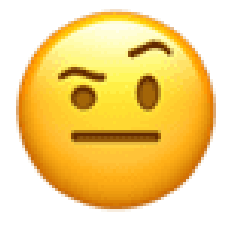

In [28]:
plt.imshow(resized)
plt.axis('off')

plt.savefig('brow.png', transparent=True, bbox_inches='tight')


In [25]:
test = convert_to_ascii_art(image, 60, 30)

In [26]:
for line in test:
    print(line)

@@@@@@@@@@@@@@@@@@@@@@@;+++++*++++++;@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@++++*******?********++++@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@:++****?%%SSS######SSS%%??**+++:@@@@@@@@@@@@@
@@@@@@@@@@@@+++**?%SS###################S%?**+++@@@@@@@@@@@
@@@@@@@@@@+++*?%SS####################S%%%SS%?*+++@@@@@@@@@
@@@@@@@@+++*?%SSSSSSSSSSSSSSSSSSSSS%*+:::::;?S%?*+++@@@@@@@
@@@@@@@++**?%SSSSSSSSSSSSSSSSSSSS*:::+?%%%%*;?SS%**++;@@@@@
@@@@@;++**%%%%%%SSSSSSSSSSSSSSSSS%?%SSSSSSSS%%%%%%?*++;@@@@
@@@@:++**%%%%%%?*;;;+*?%%%%%%%%%%%S%%%%%%%%%%%%%%%%?*++;@@@
@@@@++**????%%+::;++;:::::;?%%%%%%%%%*++*%%%%%%%%???**++@@@
@@@;++*?????????%%%%????***%%%%%%%%?;....+?%?????????*++;@@
@@++++*???????????;:..:;?%%%%%?%%?%*.:::::*??????????**+++@
@@++++**?????????;.::::.+??????????*::::::*?????????***+++@
@@;;++***????????*;::::;*???????????+::::+?????????***++;;@
@@;;++****?????????****??????????????*++??????????****++;;@
@@+;++****????????????????????????????????????????****++;;@
@@+;+++****?????????????????????????????

In [209]:
for line in test:
    print(line)

                                                           
                                                           
                                                           
                                                           
                                                           
            @%%% SSS                                       
          %S%??%S%??%#                                     
  @SSS%%%%%%%%%SS%?*?S                                     
%%??????%SSS??SSS%**%##     @S%%%%%%%%%%%%%S               
S%*++*****?*???%%%%SS%%%%%%S%%%%????????%%%%%%%S           
 %%%%??******???%%S%%???????????********???%%%%%%%         
   ##SS%??*??????????**********************??%%%%%%%       
    SSSSSS%%%%%???******++++*******+*++*****????%%%%%S     
        @#SSSS%???****++++++****+++++++*******????%%%%S    
           SSSS%??*****++++******+*++++***********??%%%    
            SSSS%???******************++**+++++****??%%%   
             SSSS%%????*?????????*******

In [234]:
# print(emoji_data.columns[4:])

emoji_type = list(emoji_data.columns[4:])

emoji_type

['Apple',
 'Google',
 'Facebook',
 'Windows',
 'Twitter',
 'JoyPixels',
 'Samsung',
 'Gmail',
 'SoftBank',
 'DoCoMo',
 'KDDI']

In [235]:
data = []
for row in range(emoji_data.shape[0]):
    entry = emoji_data.iloc[row]
    # print(entry)
    # print(emoji_type)
    for company in emoji_type:
        # print(company)
        # print(entry[company])
        try:
            decoded = base64.b64decode(entry[company].split(',')[-1])
            img = PIL.Image.open(io.BytesIO(decoded)).convert("RGBA")

            ASCII = convert_to_ascii_art(img, 60, 30)
            # print(ASCII)
            entry[company + "_ASCII"] = '\n'.join(ASCII)
        except:
            entry[company + "_ASCII"] = math.nan
    data.append(entry)


# print(data)

df = pd.DataFrame(data)

df.head()
df.shape

# print(test2.iloc[0]['Twitter_ASCII'])





(1816, 26)

In [236]:
df.head()

,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,...,Google_ASCII,Facebook_ASCII,Windows_ASCII,Twitter_ASCII,JoyPixels_ASCII,Samsung_ASCII,Gmail_ASCII,SoftBank_ASCII,DoCoMo_ASCII,KDDI_ASCII
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,...,S??******??S ...,...,++++++++++++++++++++++++ ...,+++++++++* ...,...,...,NaN,NaN,NaN
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,...,S?*?****?*?S ...,...,++++++++++++++++++++++++ ...,+++++++++* ...,...,???????????????????????????????????????????...,...,...,...
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,...,S**********S ...,...,++++++++++++++++++++++++ ...,+++++++++* ...,...,???????????????????????????????????????????...,;;;;;;;;::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;::...,NaN,NaN
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,...,S**********S ...,...,++++++++++++++++++++++++ ...,+++++++++* ...,...,???????????????????????????????????????????...,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::...,...,...
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,...,S?********?S ...,...,++++++++++++++++++++++++ ...,+++++++++* ...,...,%???????????????????????????????????????????...,NaN,...,NaN


In [237]:
df.to_csv("full_emoji_parsed.csv")

In [214]:
t2 = pd.read_csv("full_emoji_parsed.csv")

t2.shape

(1816, 27)